In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
import torch
import torch.nn as nn
from pytorch_forecasting.metrics import SMAPE,RMSE,MAPE
from torch.utils.data import DataLoader,TensorDataset
from torch import FloatTensor
from torch.optim import Adam
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

/home/sjlee/sj_virtual/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
use_col = ['volumn']
data = pd.read_csv('../../traffic/data/1.csv',usecols=use_col)
data.rename({'volumn':'value'},axis=1,inplace=True)
data['value'] = data['value'] * 8 / 1000000
data

,value
0,22.041608
1,22.048000
2,22.047176
3,22.042408
4,22.049328
...,...
38875,22.316160
38876,22.305744
38877,22.318160
38878,22.310040


In [19]:
Test_data = data.iloc[:1440]
Test_data = Test_data/data.iloc[-1]
Test_data

,value
0,0.988096
1,0.988382
2,0.988345
3,0.988132
4,0.988442
...,...
1435,0.988731
1436,0.989150
1437,0.989143
1438,0.989094


<AxesSubplot: >

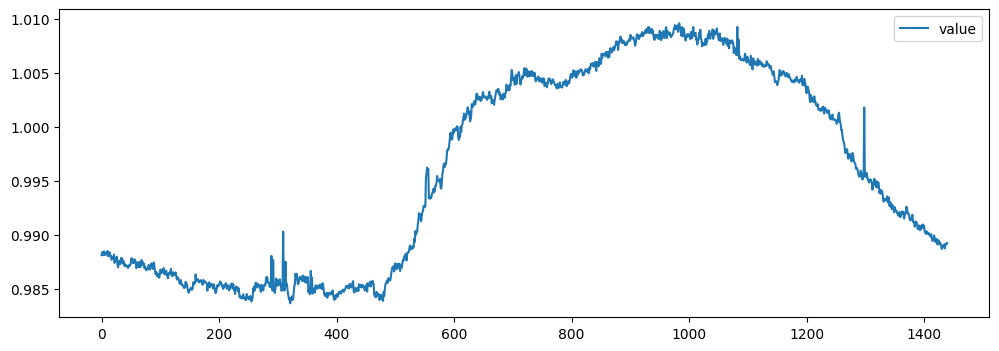

In [20]:
Test_data.plot(figsize=(12,4))

In [21]:
correlation=acf(Test_data,nlags=1440) #nlags만큼의 개수의 autocorrelation이 나옴

In [22]:
correlation=np.abs(correlation).tolist()
temp = correlation.copy()

In [23]:
correlation

[1.0,
 0.9980426947739759,
 0.9972743402942739,
 0.9964073541537908,
 0.9958265701645991,
 0.9949173177129997,
 0.9941476706238468,
 0.9932899889987554,
 0.9925108510051732,
 0.9916298210434034,
 0.9908367041149142,
 0.989977439373252,
 0.9891464558263409,
 0.9882228065492474,
 0.9872034492117728,
 0.9864135811329118,
 0.985391371500007,
 0.9846575556741815,
 0.9835089188594712,
 0.9824995355902655,
 0.9814971604413278,
 0.980394470382201,
 0.9791099496503859,
 0.9781221722863386,
 0.9769524733627545,
 0.9757845426112474,
 0.9745223166621841,
 0.9735456398408888,
 0.9722711598878429,
 0.9711278402761375,
 0.969788538145041,
 0.9685095089694794,
 0.9671455439362897,
 0.9658723456546447,
 0.9646009069703902,
 0.9633759136747494,
 0.9620173758920045,
 0.9606072984998073,
 0.9592478004401253,
 0.9578206632233037,
 0.9564096232628407,
 0.9549752954488031,
 0.9535895895784146,
 0.9519726080999943,
 0.9504243577814574,
 0.9487667067354516,
 0.9472351145319404,
 0.9456472274792552,
 0.94408147

In [24]:
len(correlation)

1440

In [25]:
temp.sort(reverse=True)
print(correlation.index(temp[1])) # 최대 index 구하기
print(correlation.index(temp[2])) # 2번째 최대 index 구하기

1
2


In [26]:
len(correlation)

1440

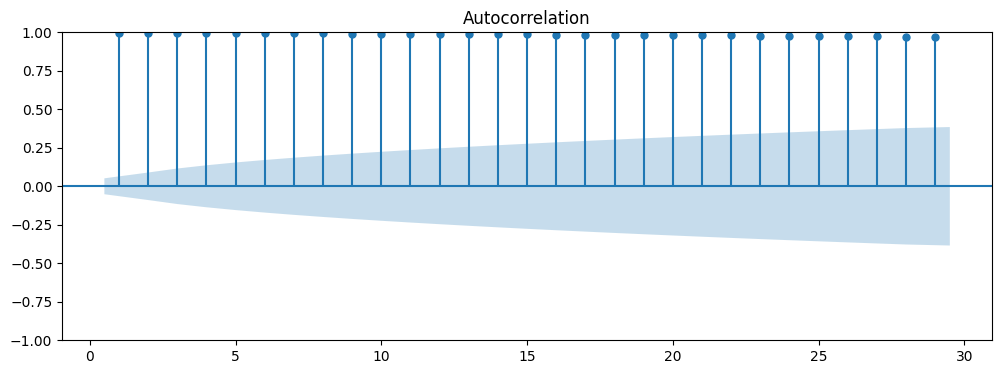

In [35]:
fig,axes = plt.subplots(1,1,figsize=(12,4))
plot_acf(x = Test_data,ax = axes,lags=np.arange(1,30));

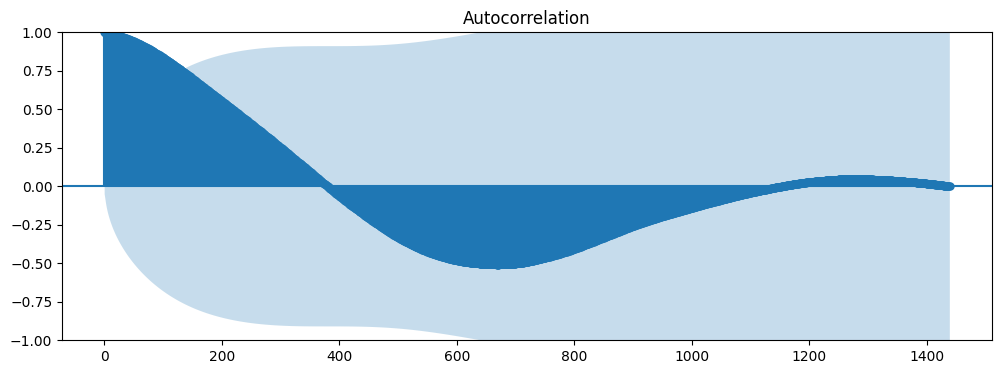

In [32]:
fig,axes = plt.subplots(1,1,figsize=(12,4))
plot_acf(x = Test_data,ax = axes,lags=np.arange(0,1440));

In [6]:
correlation=acf(data,nlags=1440) #nlags만큼의 개수의 autocorrelation이 나옴
correlation=np.abs(correlation).tolist()
temp = correlation.copy()
temp.sort(reverse=True)
print(correlation.index(temp[1])) # 최대 index 구하기
print(correlation.index(temp[2])) # 2번째 최대 index 구하기

1
2
